In [32]:
import pandas as pd

data = pd.read_csv("/kaggle/input/veriseti/pima.csv")
#data = data.iloc[:, :4]
#data.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness"]
selected_attributes = data[['Preg', 'Plas', 'Pres', 'Skin']]
#dataset = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Outcome']]

In [33]:
five_number_summary = selected_attributes.describe().loc[['min', '25%', '50%', '75%', 'max']]
#data.describe()
print(five_number_summary)

     Preg    Plas   Pres  Skin
min   0.0    0.00    0.0   0.0
25%   1.0   99.00   62.0   0.0
50%   3.0  117.00   72.0  23.0
75%   6.0  140.25   80.0  32.0
max  17.0  199.00  122.0  99.0


In [34]:
mean_values = selected_attributes.mean()
#data.mean()
print(mean_values)

Preg      3.845052
Plas    120.894531
Pres     69.105469
Skin     20.536458
dtype: float64


In [35]:
#from scipy import stats

#data.mode(numeric_only=True)

mode_values = selected_attributes.mode().iloc[0]
print(mode_values)

Preg     1.0
Plas    99.0
Pres    70.0
Skin     0.0
Name: 0, dtype: float64


In [36]:
iqr_values = selected_attributes.quantile(0.75) - selected_attributes.quantile(0.25)

#Q1 = data.quantile(0.25)
#Q3 = data.quantile(0.75)
#IQR = Q3 - Q1
print(iqr_values)

Preg     5.00
Plas    41.25
Pres    18.00
Skin    32.00
dtype: float64


In [37]:
variance_values = selected_attributes.var()
std_deviation_values = selected_attributes.std()

#var = data.var()
#std = data.std()

print(variance_values)
print(end = "\n")
print(std_deviation_values)

Preg      11.354056
Plas    1022.248314
Pres     374.647271
Skin     254.473245
dtype: float64

Preg     3.369578
Plas    31.972618
Pres    19.355807
Skin    15.952218
dtype: float64


In [48]:
outlier_values = selected_attributes[(selected_attributes < selected_attributes.quantile(0.25) - 1.5 * iqr_values) | (selected_attributes > selected_attributes.quantile(0.75) + 1.5 * iqr_values)]
print(outlier_values)

     Preg  Plas  Pres  Skin
0    14.0   NaN   NaN   NaN
1     NaN   NaN   NaN   NaN
2    15.0   NaN   NaN   NaN
3     NaN   NaN   NaN   NaN
4     NaN   NaN   NaN   NaN
..    ...   ...   ...   ...
763   NaN   NaN   NaN   NaN
764   NaN   NaN   NaN   NaN
765   NaN   NaN   0.0   NaN
766   NaN   NaN   NaN   NaN
767   NaN   NaN   NaN   NaN

[768 rows x 4 columns]


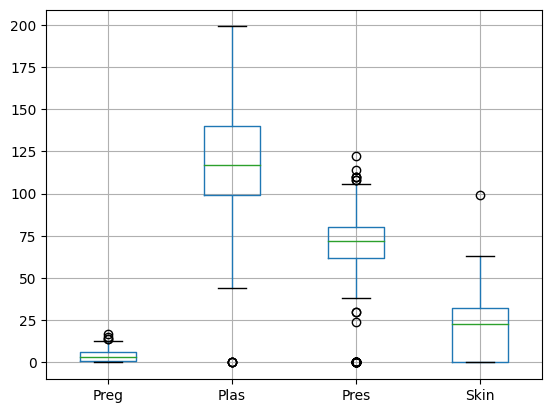

In [40]:
import matplotlib.pyplot as plt

data.boxplot(column=['Preg', 'Plas', 'Pres', 'Skin'])
plt.show()

In [42]:
# Normalizasyon işlemlerini gerçekleştirme
min_max_normalized = (selected_attributes - selected_attributes.min()) / (selected_attributes.max() - selected_attributes.min())
z_score_normalized = (selected_attributes - selected_attributes.mean()) / selected_attributes.std()

print("Min-Max Normalized Data:")
print(min_max_normalized.head())

print("\nZ-Score Normalized Data:")
print(z_score_normalized.head())

Min-Max Normalized Data:
       Preg      Plas      Pres      Skin
0  0.823529  0.879397  0.508197  0.303030
1  0.235294  0.733668  0.639344  0.000000
2  0.882353  0.683417  0.573770  0.323232
3  0.176471  0.537688  0.508197  0.131313
4  0.176471  0.849246  0.606557  0.191919

Z-Score Normalized Data:
       Preg      Plas      Pres      Skin
0  3.013715  1.692244 -0.367098  0.593243
1  0.045984  0.785218  0.459528 -1.287373
2  3.310488  0.472450  0.046215  0.718617
3 -0.250789 -0.434576 -0.367098 -0.472440
4 -0.250789  1.504583  0.252871 -0.096316


In [43]:
import matplotlib.pyplot as plt

# Ayrıklaştırma fonksiyonu
def equal_width_discretization(data, num_bins):
    width = (data.max() - data.min()) / num_bins
    bins = [data.min() + i*width for i in range(num_bins+1)]
    labels = [f"Bin {i}" for i in range(num_bins)]
    data_discretized = pd.cut(data, bins=bins, labels=labels, include_lowest=True)
    return pd.Series(data_discretized)

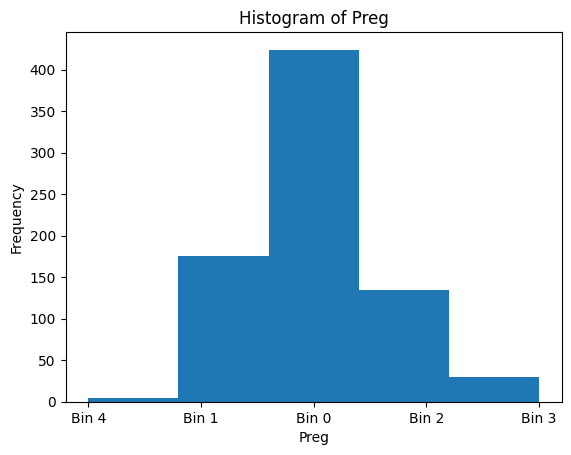

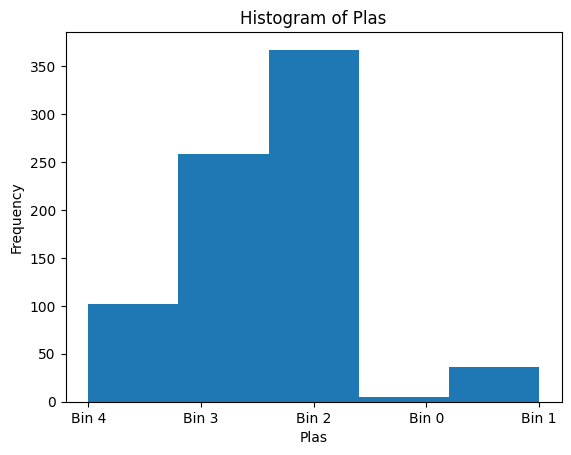

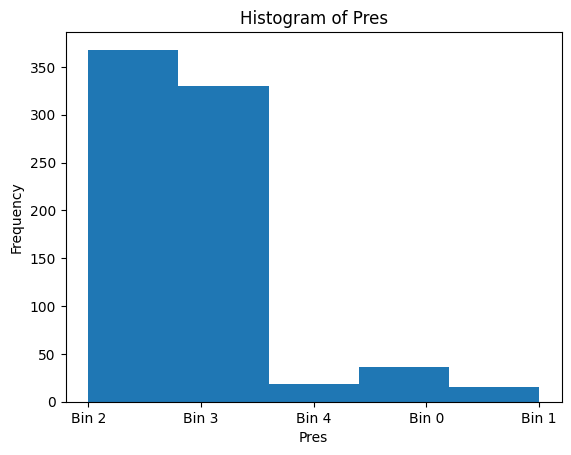

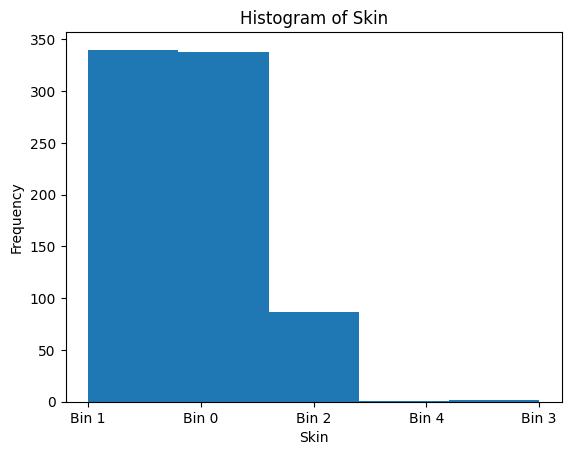

In [44]:
# Ayrıklaştırma işlemlerini gerçekleştirme
num_bins = 5
discretized_data = selected_attributes.apply(equal_width_discretization, args=(num_bins,))

# Frekans tabanlı histogram çizimi
for column in discretized_data:
    plt.hist(discretized_data[column], bins=num_bins)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [45]:
import pandas as pd

# Veri kümesini yükleme
pima_data = pd.read_csv("/kaggle/input/veriseti/pima.csv")

# İlgilenilen nitelikleri seçme
subset = pima_data[['Preg', 'Plas', 'Pres', 'Skin','Class']]

In [46]:
from math import log2
from collections import Counter

def equal_width_discretization(data, num_bins):
    width = (data.max() - data.min()) / num_bins
    bins = [data.min() + i*width for i in range(num_bins+1)]
    labels = [f"Bin {i}" for i in range(num_bins)]
    data_discretized = pd.cut(data, bins=bins, labels=labels, include_lowest=True)
    return pd.Series(data_discretized)

def calculate_entropy(data):
    counter = Counter(data)
    total = len(data)
    entropy = 0
    for count in counter.values():
        probability = count / total
        entropy -= probability * log2(probability)
    return entropy

def calculate_information_gain(data, target):
    target_entropy = calculate_entropy(target)
    attribute_entropy = 0
    values = data.unique()
    for value in values:
        subset = data[data == value]
        target_subset = target[subset.index]
        subset_entropy = calculate_entropy(target_subset)
        probability = len(subset) / len(data)
        attribute_entropy += probability * subset_entropy
    information_gain = target_entropy - attribute_entropy
    return information_gain

# Veri kümesindeki her bir sürekli nitelik için ayrıklaştırma ve bilgi kazancını hesaplama
num_bins_3 = 3
num_bins_4 = 4

for column in subset.columns[:-1]:
    data_discretized_3 = equal_width_discretization(subset[column], num_bins_3)
    information_gain_3 = calculate_information_gain(data_discretized_3, subset['Class'])
    print(f'Information gain for {column} with 3 bins: {information_gain_3}')

    data_discretized_4 = equal_width_discretization(subset[column], num_bins_4)
    information_gain_4 = calculate_information_gain(data_discretized_4, subset['Class'])
    print(f'Information gain for {column} with 4 bins: {information_gain_4}')

Information gain for Preg with 3 bins: 0.03110458311303499
Information gain for Preg with 4 bins: 0.03284481959733776
Information gain for Plas with 3 bins: 0.12026445038495848
Information gain for Plas with 4 bins: 0.16235073390673893
Information gain for Pres with 3 bins: 0.014829514825483447
Information gain for Pres with 4 bins: 0.0203550819702073
Information gain for Skin with 3 bins: 0.014132245491725648
Information gain for Skin with 4 bins: 0.013421613475551819
